In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import nltk
import tensorflow as tf
import seaborn as sns, matplotlib.pyplot as plt
import re
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [4]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
data.shape

(50000, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


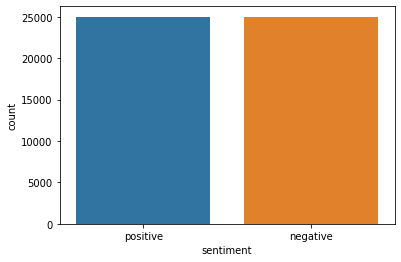

negative    25000
positive    25000
Name: sentiment, dtype: int64


In [8]:
sns.countplot(data['sentiment'])
plt.show()
print(data.sentiment.value_counts())

In [9]:
data.sentiment=[1 if sentiment=='positive' else 0 for sentiment in data.sentiment]

In [10]:
print(data.sentiment.value_counts())

1    25000
0    25000
Name: sentiment, dtype: int64


In [11]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [12]:
WPT= nltk.WordPunctTokenizer()
stop_words_list=nltk.corpus.stopwords.words('english')

In [13]:
stop_words_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

data['review'] = data['review'].apply(lambda x: x.lower())

data['review'] = data['review'].apply(lambda x: x.strip())

In [18]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the ...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is a...,1
5,probably my all time favorite movie a story of...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative id...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [19]:
# def token(values):
#    words = nltk.tokenize.word_tokenize(values)
#    filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
#    not_stopword_doc = " ".join(filtered_words)
#    return not_stopword_doc
# data['review'] = data['review'].apply(lambda x: token(x))

In [20]:
sentiment=data.sentiment.values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
data=data['review']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(data,sentiment,test_size=0.2)

In [23]:
print('Train set size:',x_train.shape)
print('Test set size:', x_test.shape)


Train set size: (40000,)
Test set size: (10000,)


In [26]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(num_words=15000)
tokenizer.fit_on_texts(data)

In [29]:
tokenizer

In [27]:
x_train_token= tokenizer.texts_to_sequences(x_train)
x_test_token= tokenizer.texts_to_sequences(x_test)

In [28]:
x_train_token

[[10,
  42,
  190,
  145,
  38,
  315,
  2852,
  8,
  8,
  785,
  69,
  255,
  31,
  1,
  257,
  92,
  42,
  24,
  1,
  531,
  4,
  150,
  10,
  39,
  5,
  142,
  952,
  5,
  66,
  7,
  7,
  149,
  88,
  23,
  75,
  69,
  358,
  8,
  216,
  94,
  3,
  82,
  3166,
  767,
  46,
  11,
  70,
  139,
  10,
  14,
  148,
  22,
  226,
  10,
  216,
  29,
  3178,
  204,
  9,
  8,
  408,
  35,
  486,
  166,
  31,
  48,
  3789,
  142,
  144,
  162,
  2,
  101,
  376,
  22,
  901,
  8,
  81,
  608,
  244,
  36,
  1155,
  148,
  3789,
  7,
  7,
  19,
  53,
  10,
  142,
  5,
  1,
  99,
  10,
  39,
  5,
  29,
  2274,
  10,
  140,
  24,
  40,
  5,
  29,
  5651,
  149,
  10,
  120,
  48,
  92,
  39,
  16,
  1645,
  7625,
  162,
  25,
  269,
  45,
  22,
  19,
  13005,
  10,
  216,
  248,
  42,
  420,
  31,
  27,
  607,
  73,
  3070,
  44,
  100,
  4,
  12,
  7,
  7,
  30,
  52,
  150,
  18,
  1,
  77,
  1997,
  4354,
  47,
  10,
  216,
  519,
  5,
  66,
  89,
  634,
  59,
  627,
  38,
  13932,
  689,
  16